# Building neural networks with PyTorch

PyTorch provides a module `nn` that makes building networks much simpler. Here we'll build and train a neural network that can recognise hand written digits.

You can define the network somewhat more concisely and clearly using the `torch.nn.functional` module. This is the most common way you'll see networks defined as many operations are simple element-wise functions. We normally import this module as `F`, `import torch.nn.functional as F`.

**Note** : For those who don't have numpy and matplotlib installed run the following commands.

* pip install numpy
* pip install matplotlib

In [16]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import numpy as np
import torch

import helper

import matplotlib.pyplot as plt


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


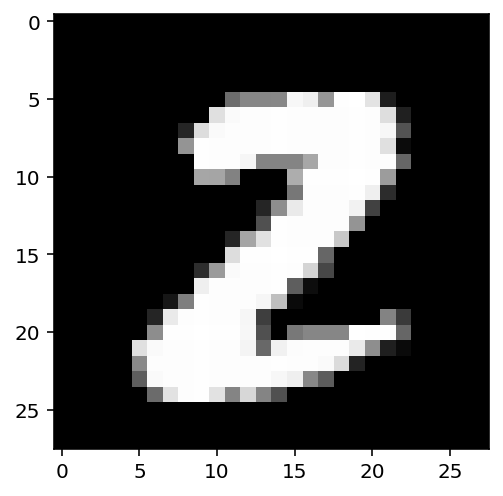

In [17]:
#Obtaining the data set
from torchvision import datasets, transforms

#Tranforming the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5),(0.5))])
#Download dataset
trainset =  datasets.MNIST('~/.pytorch/MNIST_data', download=True, train=True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#Image sample
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [18]:
#Build a Neural Network
from torch import nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #layers are 784 inputs 128 hidden1, 64 hidden2, 10 output
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        #output layer
        self.fc3 = nn.Linear(64, 10)

    def forward(self ,x):
        x=self.fc1(x)
        x=F.relu(x)
        x=self.fc2(x)
        x=F.relu(x)
        x=self.fc3(x)
        x=F.softmax(x,dim=1)
        
        return x
    
model = Network()



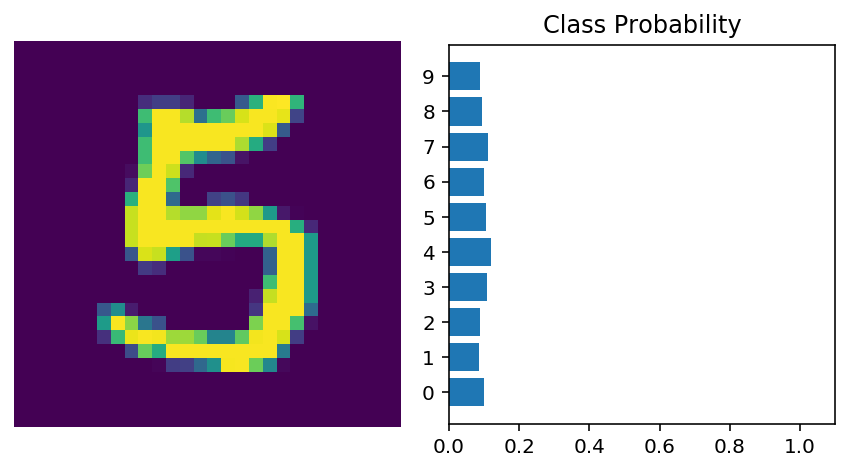

In [19]:
# Forward Pass
dataiter = iter(trainloader)
images, labels = dataiter.next()

#Resize images (batch_size, color channel, pixels)
images.resize_(64, 1, 784) #28*28

#forward pass
img_index = 0
ps = model.forward(images[img_index,:])

img = images[img_index,:]
helper.view_classify(img.view(1,28,28),ps)

